In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def initialize_parameters(ld):
    params={}
    layers=len(ld)-1
    for i in range(layers):
        params['w'+str(i+1)]=tf.get_variable('w'+str(i+1),[ld[i+1],ld[i]],initializer=tf.contrib.layers.xavier_initializer(seed=1))
        params['b'+str(i+1)]=tf.get_variable('b'+str(i+1),[ld[i+1],1],initializer=tf.zeros_initializer())
    return params

In [3]:
def forward_propagation(x,params):
    layers=len(params)//2
    z=x
    for i in range(layers-1):
        z=tf.add(tf.matmul(params['w'+str(i+1)],z),params['b'+str(i+1)])
        z=tf.nn.relu(z)
    z=tf.add((tf.matmul(params['w'+str(layers)],z)),params['b'+str(layers)])
    return z

In [4]:
def compute_cost(logits,labels):
    logits=tf.transpose(logits)
    labels=tf.transpose(labels)
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    return cost

In [5]:
def random_mini_batches(x,y,mini_batch_size=32,seed=1):
    m=x.shape[1]
    num_total_mini_batches=m//mini_batch_size
    minibatches=[]
    perm=list(np.random.permutation(m))
    x=x[:,perm]
    y=y[:,perm]
    for i in range (num_total_mini_batches):
        minibatch_x=x[:,i*mini_batch_size:(i+1)*mini_batch_size]
        minibatch_y=y[:,i*mini_batch_size:(i+1)*mini_batch_size]
        minibatch=(minibatch_x,minibatch_y)
        minibatches.append(minibatch)
    if m%mini_batch_size!=0:
        minibatch_x=x[:,mini_batch_size*num_total_mini_batches:m]
        minibatch_y=y[:,mini_batch_size*num_total_mini_batches:m]
        minibatch=(minibatch_x,minibatch_y)
        minibatches.append(minibatch)
    return minibatches

In [13]:
def train(xtr,ytr,ld,learning_rate=0.001,epochs=20,mini_batch_size=64):
    n_x,m=xtr.shape
    n_y,_=ytr.shape
    X=tf.placeholder(tf.float32,(n_x,None))
    Y=tf.placeholder(tf.float32,(n_y,None))
    params=initialize_parameters(ld)
    zf=forward_propagation(X,params)
    cost=compute_cost(zf,Y)
    optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init=tf.global_variables_initializer()
    costs=[]
    with tf.Session() as sess:
        sess.run(init)
        for i in range(epochs):
            epoch_cost=0
            minibatches=random_mini_batches(xtr,ytr,mini_batch_size)
            for minibatch in minibatches:
                minibatch_x,minibatch_y=minibatch
                _,c=sess.run([optimizer,cost],feed_dict={X:minibatch_x,Y:minibatch_y})
                epoch_cost+=c
            if i%5==0:
                costs.append(epoch_cost)
                print('cost after epoch '+str(i)+':'+str(epoch_cost))
        params=sess.run(params)
    plt.plot(np.squeeze(costs))
    plt.xlabel('epochs in 5s')
    plt.ylabel('cost')
    plt.title('cost vs epochs')
    return params

In [34]:
df=pd.read_csv('./datasets/fashion-mnist_train.csv')
train_data=df.as_matrix()
xtr=train_data[:,1::]
ytr=train_data[:,0].reshape(60000,1)
print('xtr:'+str(xtr.shape))
print('ytr:'+str(ytr.shape))
ytr=ytr.T
xtr=xtr.T
print('xtr:'+str(xtr.shape))
print('ytr:'+str(ytr.shape))
ytroh=tf.one_hot(ytr,10,axis=0)
print(ytroh.shape)
with tf.Session() as sess:
    ytroh=sess.run(ytroh)
ytroh=ytroh.reshape(10,60000)
print('ytroh:'+str(ytroh.shape))

xtr:(60000, 784)
ytr:(60000, 1)
xtr:(784, 60000)
ytr:(1, 60000)
(10, 1, 60000)
ytroh:(10, 60000)


In [35]:
df=pd.read_csv('./datasets/fashion-mnist_test.csv')
train_data=df.as_matrix()
xts=train_data[:,1::]
yts=train_data[:,0].reshape(10000,1)
print('xts:'+str(xts.shape))
print('yts:'+str(yts.shape))
yts=yts.T
xts=xts.T
print('xts:'+str(xts.shape))
print('yts:'+str(yts.shape))

xts:(10000, 784)
yts:(10000, 1)
xts:(784, 10000)
yts:(1, 10000)


cost after epoch 0:1147.0724445283413
cost after epoch 5:333.53454035520554
cost after epoch 10:286.60209007561207
cost after epoch 15:250.5109890922904
cost after epoch 20:230.61835397034883
cost after epoch 25:205.59671615622938
cost after epoch 30:194.21767996624112
cost after epoch 35:183.034014031291
cost after epoch 40:174.41544054076076
cost after epoch 45:160.50897178053856
cost after epoch 50:155.7081478703767
cost after epoch 55:145.7590426541865
cost after epoch 60:155.2300070375204
cost after epoch 65:148.81629158370197
cost after epoch 70:125.274319274351
cost after epoch 75:130.04913303256035
cost after epoch 80:123.84035289194435
cost after epoch 85:130.48043461237103
cost after epoch 90:118.06790320109576
cost after epoch 95:115.83742183819413
cost after epoch 100:121.3475539740175


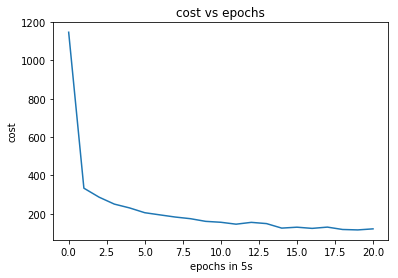

In [21]:
ld=[784,400,250,100,50,10]
tf.reset_default_graph()
params=train(xtr,ytroh,ld,epochs=101)

In [22]:
def for_prop(x,params):
    xx=tf.placeholder(tf.float32,(x.shape[0],None))
    zf=forward_propagation(xx,params)
    with tf.Session() as sess:
        zf=sess.run(zf,feed_dict={xx:x})
    preds=np.argmax(zf,axis=0)
    return preds

In [23]:
def accuracy(preds,y):
    return np.mean(preds==y)

In [25]:
preds=for_prop(xtr,params)
acc=accuracy(preds,ytr)
print('train accuracy:'+str(acc))

train accuracy:0.9579166666666666


In [32]:
preds=for_prop(xts,params)
acc=accuracy(preds,yts)
print('test accuracy:'+str(acc))

test accuracy:0.8935


In [39]:
classes=['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle-boot']

predicted class:trouser


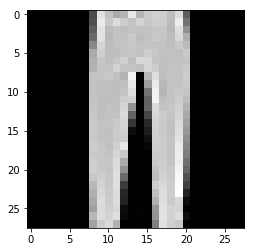

In [66]:
n=np.random.randint(0,60000)
eg=xtr[:,n].reshape(784,1)
egp=eg.reshape(28,28)
plt.imshow(egp,cmap='gray')
pred=for_prop(eg,params)
print('predicted class:'+str(classes[np.squeeze(pred)]))